


Problem description:

Your goal is to predict the total_cases label for each (city, year, weekofyear) in the test set. There are two cities, San Juan and Iquitos, with test data for each city spanning 5 and 3 years respectively. You will make one submission that contains predictions for both cities. The data for each city have been concatenated along with a city column indicating the source: sj for San Juan and iq for Iquitos. The test set is a pure future hold-out, meaning the test data are sequential and non-overlapping with any of the training data. Throughout, missing values have been filled as NaNs.

Assignment:

The goal is achieved through three subsequent Assignments 1, 2 and 3, all using the same dataset


You are provided the following set of information on a (year, weekofyear) timescale:

(Where appropriate, units are provided as a _unit suffix on the feature name.)

City and date indicators

    city – City abbreviations: sj for San Juan and iq for Iquitos
    week_start_date – Date given in yyyy-mm-dd format

NOAA's GHCN daily climate data weather station measurements

    station_max_temp_c – Maximum temperature
    station_min_temp_c – Minimum temperature
    station_avg_temp_c – Average temperature
    station_precip_mm – Total precipitation
    station_diur_temp_rng_c – Diurnal temperature range
    
PERSIANN satellite precipitation measurements (0.25x0.25 degree scale)

    precipitation_amt_mm – Total precipitation

NOAA's NCEP Climate Forecast System Reanalysis measurements (0.5x0.5 degree scale)

    reanalysis_sat_precip_amt_mm – Total precipitation
    reanalysis_dew_point_temp_k – Mean dew point temperature
    reanalysis_air_temp_k – Mean air temperature
    reanalysis_relative_humidity_percent – Mean relative humidity
    reanalysis_specific_humidity_g_per_kg – Mean specific humidity
    reanalysis_precip_amt_kg_per_m2 – Total precipitation
    reanalysis_max_air_temp_k – Maximum air temperature
    reanalysis_min_air_temp_k – Minimum air temperature
    reanalysis_avg_temp_k – Average air temperature
    reanalysis_tdtr_k – Diurnal temperature range

Satellite vegetation - Normalized difference vegetation index (NDVI) - NOAA's CDR Normalized Difference Vegetation Index (0.5x0.5 degree scale) measurements

    ndvi_se – Pixel southeast of city centroid
    ndvi_sw – Pixel southwest of city centroid
    ndvi_ne – Pixel northeast of city centroid
    ndvi_nw – Pixel northwest of city centroid

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Load the file 'dengue_features_train.csv', display the top 3 rows and observe the data. Then programmatically define the column names to make the following changes. 

In [2]:
df = pd.read_csv("dengue_features_train.csv")
df.head(3)

city  year  weekofyear week_start_date  ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  1990          18      1990-04-30  0.12260  0.103725  0.198483   
1   sj  1990          19      1990-05-07  0.16990  0.142175  0.162357   
2   sj  1990          20      1990-05-14  0.03225  0.172967  0.157200   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  ...  \
0  0.177617                 12.42             297.572857  ...   
1  0.155486                 22.82             298.211429  ...   
2  0.170843                 34.54             298.781429  ...   

   reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                            32.00                             73.365714   
1                            17.94                             77.368571   
2                            26.10                             82.052857   

   reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
0                         12.42                              14.012857   
1                         22.82                              15.372857   
2                         34.54                              16.848571   

   reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
0           2.628571           25.442857                 6.900000   
1           2.371429           26.714286                 6.371429   
2           2.300000           26.714286                 6.485714   

   station_max_temp_c  station_min_temp_c  station_precip_mm  
0                29.4                20.0               16.0  
1                31.7                22.2                8.6  
2                32.2                22.8               41.4  

[3 rows x 24 columns]

In [3]:
df.columns # list all the columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

In [4]:
df.shape

(1456, 24)

a). rename columns which have 'station' such that 'station' is abbreviated to 'stn' and rest of column name remains intact. For example column name 'station_diur_temp_rng_c' is renamed to 'station_diur_tmp_rng_c'

b). similarly rename columns which have 'reanalysis' to abbreviate 're_an', retaining rest of column name same

c). rename columns which have 'humidity' to abbreviate to 'hd', retaining rest of column name same

d). abbreviate 'precipitation' part of column name to 'prec', retaining rest of column name same






In [5]:
## a) abbreviate station to stn 
df.columns = df.columns.str.replace("station", "stn")
## b) 'reanalysis' as 're_an'
df.columns = df.columns.str.replace("reanalysis", "re_an")
## c) 'humidity' as 'hd'
df.columns = df.columns.str.replace("humidity","hd")
## d) 'precipitation' as 'prec'
df.columns = df.columns.str.replace("precipitation","prec")
# check if the columns have been renamed
df.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'prec_amt_mm', 're_an_air_temp_k',
       're_an_avg_temp_k', 're_an_dew_point_temp_k', 're_an_max_air_temp_k',
       're_an_min_air_temp_k', 're_an_precip_amt_kg_per_m2',
       're_an_relative_hd_percent', 're_an_sat_precip_amt_mm',
       're_an_specific_hd_g_per_kg', 're_an_tdtr_k', 'stn_avg_temp_c',
       'stn_diur_temp_rng_c', 'stn_max_temp_c', 'stn_min_temp_c',
       'stn_precip_mm'],
      dtype='object')

e). view top 3 rows and recheck if column name changes have taken effect

In [6]:
# e) check if the columns are renamed
df.head(3)

city  year  weekofyear week_start_date  ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  1990          18      1990-04-30  0.12260  0.103725  0.198483   
1   sj  1990          19      1990-05-07  0.16990  0.142175  0.162357   
2   sj  1990          20      1990-05-14  0.03225  0.172967  0.157200   

    ndvi_sw  prec_amt_mm  re_an_air_temp_k  ...  re_an_precip_amt_kg_per_m2  \
0  0.177617        12.42        297.572857  ...                       32.00   
1  0.155486        22.82        298.211429  ...                       17.94   
2  0.170843        34.54        298.781429  ...                       26.10   

   re_an_relative_hd_percent  re_an_sat_precip_amt_mm  \
0                  73.365714                    12.42   
1                  77.368571                    22.82   
2                  82.052857                    34.54   

   re_an_specific_hd_g_per_kg  re_an_tdtr_k  stn_avg_temp_c  \
0                   14.012857      2.628571       25.442857   
1                   15.372857      2.371429       26.714286   
2                   16.848571      2.300000       26.714286   

   stn_diur_temp_rng_c  stn_max_temp_c  stn_min_temp_c  stn_precip_mm  
0             6.900000            29.4            20.0           16.0  
1             6.371429            31.7            22.2            8.6  
2             6.485714            32.2            22.8           41.4  

[3 rows x 24 columns]

f). check the type of columns in dataframe

In [7]:
# f) check the type of the columns
df.dtypes

city                           object
year                            int64
weekofyear                      int64
week_start_date                object
ndvi_ne                       float64
ndvi_nw                       float64
ndvi_se                       float64
ndvi_sw                       float64
prec_amt_mm                   float64
re_an_air_temp_k              float64
re_an_avg_temp_k              float64
re_an_dew_point_temp_k        float64
re_an_max_air_temp_k          float64
re_an_min_air_temp_k          float64
re_an_precip_amt_kg_per_m2    float64
re_an_relative_hd_percent     float64
re_an_sat_precip_amt_mm       float64
re_an_specific_hd_g_per_kg    float64
re_an_tdtr_k                  float64
stn_avg_temp_c                float64
stn_diur_temp_rng_c           float64
stn_max_temp_c                float64
stn_min_temp_c                float64
stn_precip_mm                 float64
dtype: object

g). Change the column 'year' as categorical variable and check if the column data type is changed and the levels of category are correct. As an example, 'city' is converted into categorical below with two categories (of cities).

In [8]:
df.city = df.city.astype('category')
df.city.value_counts()

sj    936
iq    520
Name: city, dtype: int64

In [9]:
# g) change year variable type as category
df.year = df.year.astype('category')
df.year.value_counts()

2001    104
2003    104
2002    104
2007    104
2006    104
2005    104
2004    104
2000     78
2008     69
1991     52
2009     52
1999     52
1998     52
1997     52
1996     52
1995     52
1994     52
1993     52
1992     52
1990     35
2010     26
Name: year, dtype: int64

In [11]:
df.year.dtype

CategoricalDtype(categories=[1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
                  2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
                  2010],
                 ordered=False)

The datatype of the column years is changed to category type.

2. The predictor column (y-value) is present in the file 'dengue_labels_train.csv'. Read this file in a new dataframe and merge it with the above dataframe using city, year and weekofyear as join conditions. 



In [12]:
# Load data for predictor column
df_pred = pd.read_csv("dengue_labels_train.csv")
df_pred.shape

(1456, 4)

The dataset dengue_labels_train.csv has 1456 rows with 4 columns

In [13]:
df_pred.columns

Index(['city', 'year', 'weekofyear', 'total_cases'], dtype='object')

In [14]:
#Merge datasets dengue_features_train.csv and dengue_labels_train.csv

data = pd.merge(df, df_pred,on = ["city","year","weekofyear"])
data.columns # new column 'total_cases' is added

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'prec_amt_mm', 're_an_air_temp_k',
       're_an_avg_temp_k', 're_an_dew_point_temp_k', 're_an_max_air_temp_k',
       're_an_min_air_temp_k', 're_an_precip_amt_kg_per_m2',
       're_an_relative_hd_percent', 're_an_sat_precip_amt_mm',
       're_an_specific_hd_g_per_kg', 're_an_tdtr_k', 'stn_avg_temp_c',
       'stn_diur_temp_rng_c', 'stn_max_temp_c', 'stn_min_temp_c',
       'stn_precip_mm', 'total_cases'],
      dtype='object')

In [15]:
data.head(3)

city  year  weekofyear week_start_date  ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  1990          18      1990-04-30  0.12260  0.103725  0.198483   
1   sj  1990          19      1990-05-07  0.16990  0.142175  0.162357   
2   sj  1990          20      1990-05-14  0.03225  0.172967  0.157200   

    ndvi_sw  prec_amt_mm  re_an_air_temp_k  ...  re_an_relative_hd_percent  \
0  0.177617        12.42        297.572857  ...                  73.365714   
1  0.155486        22.82        298.211429  ...                  77.368571   
2  0.170843        34.54        298.781429  ...                  82.052857   

   re_an_sat_precip_amt_mm  re_an_specific_hd_g_per_kg  re_an_tdtr_k  \
0                    12.42                   14.012857      2.628571   
1                    22.82                   15.372857      2.371429   
2                    34.54                   16.848571      2.300000   

   stn_avg_temp_c  stn_diur_temp_rng_c  stn_max_temp_c  stn_min_temp_c  \
0       25.442857             6.900000            29.4            20.0   
1       26.714286             6.371429            31.7            22.2   
2       26.714286             6.485714            32.2            22.8   

   stn_precip_mm  total_cases  
0           16.0            4  
1            8.6            5  
2           41.4            4  

[3 rows x 25 columns]

Count NANs in merged dataframe and use forward fill method to fill NANs (df_merged.fillna(method='ffill'))

In [16]:
data.isna().sum()

city                            0
year                            0
weekofyear                      0
week_start_date                 0
ndvi_ne                       194
ndvi_nw                        52
ndvi_se                        22
ndvi_sw                        22
prec_amt_mm                    13
re_an_air_temp_k               10
re_an_avg_temp_k               10
re_an_dew_point_temp_k         10
re_an_max_air_temp_k           10
re_an_min_air_temp_k           10
re_an_precip_amt_kg_per_m2     10
re_an_relative_hd_percent      10
re_an_sat_precip_amt_mm        13
re_an_specific_hd_g_per_kg     10
re_an_tdtr_k                   10
stn_avg_temp_c                 43
stn_diur_temp_rng_c            43
stn_max_temp_c                 20
stn_min_temp_c                 14
stn_precip_mm                  22
total_cases                     0
dtype: int64

In [17]:
data.isna().sum().sum()

548

In [18]:
data = (data.fillna(method='ffill'))

a). Do a random check by printing few values from both files and merged file

In [19]:
# random check on dataset 'dengue_features_train.csv'
df.head()

city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  1990          18      1990-04-30  0.122600  0.103725  0.198483   
1   sj  1990          19      1990-05-07  0.169900  0.142175  0.162357   
2   sj  1990          20      1990-05-14  0.032250  0.172967  0.157200   
3   sj  1990          21      1990-05-21  0.128633  0.245067  0.227557   
4   sj  1990          22      1990-05-28  0.196200  0.262200  0.251200   

    ndvi_sw  prec_amt_mm  re_an_air_temp_k  ...  re_an_precip_amt_kg_per_m2  \
0  0.177617        12.42        297.572857  ...                       32.00   
1  0.155486        22.82        298.211429  ...                       17.94   
2  0.170843        34.54        298.781429  ...                       26.10   
3  0.235886        15.36        298.987143  ...                       13.90   
4  0.247340         7.52        299.518571  ...                       12.20   

   re_an_relative_hd_percent  re_an_sat_precip_amt_mm  \
0                  73.365714                    12.42   
1                  77.368571                    22.82   
2                  82.052857                    34.54   
3                  80.337143                    15.36   
4                  80.460000                     7.52   

   re_an_specific_hd_g_per_kg  re_an_tdtr_k  stn_avg_temp_c  \
0                   14.012857      2.628571       25.442857   
1                   15.372857      2.371429       26.714286   
2                   16.848571      2.300000       26.714286   
3                   16.672857      2.428571       27.471429   
4                   17.210000      3.014286       28.942857   

   stn_diur_temp_rng_c  stn_max_temp_c  stn_min_temp_c  stn_precip_mm  
0             6.900000            29.4            20.0           16.0  
1             6.371429            31.7            22.2            8.6  
2             6.485714            32.2            22.8           41.4  
3             6.771429            33.3            23.3            4.0  
4             9.371429            35.0            23.9            5.8  

[5 rows x 24 columns]

In [20]:
data.to_csv('merged_data.csv', index = False)

In [21]:
# random check on dataset 'dengue_labels_train.csv'
df_pred.head()

city  year  weekofyear  total_cases
0   sj  1990          18            4
1   sj  1990          19            5
2   sj  1990          20            4
3   sj  1990          21            3
4   sj  1990          22            6

In [22]:
#Merged dataset 'data'
data.head()

city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  1990          18      1990-04-30  0.122600  0.103725  0.198483   
1   sj  1990          19      1990-05-07  0.169900  0.142175  0.162357   
2   sj  1990          20      1990-05-14  0.032250  0.172967  0.157200   
3   sj  1990          21      1990-05-21  0.128633  0.245067  0.227557   
4   sj  1990          22      1990-05-28  0.196200  0.262200  0.251200   

    ndvi_sw  prec_amt_mm  re_an_air_temp_k  ...  re_an_relative_hd_percent  \
0  0.177617        12.42        297.572857  ...                  73.365714   
1  0.155486        22.82        298.211429  ...                  77.368571   
2  0.170843        34.54        298.781429  ...                  82.052857   
3  0.235886        15.36        298.987143  ...                  80.337143   
4  0.247340         7.52        299.518571  ...                  80.460000   

   re_an_sat_precip_amt_mm  re_an_specific_hd_g_per_kg  re_an_tdtr_k  \
0                    12.42                   14.012857      2.628571   
1                    22.82                   15.372857      2.371429   
2                    34.54                   16.848571      2.300000   
3                    15.36                   16.672857      2.428571   
4                     7.52                   17.210000      3.014286   

   stn_avg_temp_c  stn_diur_temp_rng_c  stn_max_temp_c  stn_min_temp_c  \
0       25.442857             6.900000            29.4            20.0   
1       26.714286             6.371429            31.7            22.2   
2       26.714286             6.485714            32.2            22.8   
3       27.471429             6.771429            33.3            23.3   
4       28.942857             9.371429            35.0            23.9   

   stn_precip_mm  total_cases  
0           16.0            4  
1            8.6            5  
2           41.4            4  
3            4.0            3  
4            5.8            6  

[5 rows x 25 columns]

In [23]:
print(df.shape)
print(df_pred.shape)
print(data.shape)

(1456, 24)
(1456, 4)
(1456, 25)


The datasets dengue_features_train and dengue_labels_train have 1456 rows. Above is the number of columns and rows in both the dataframes. When these dataframes are merged we have a dataframe "data" with 1456 rows and 25 columns.

b). Do a scatter plot of weekofyear on x-axis and total_cases on y-axis and observe if there is a relationship.

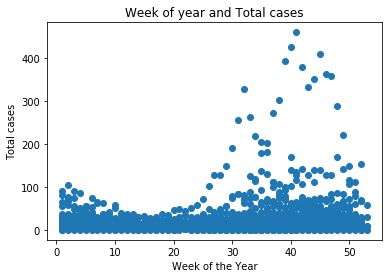

In [24]:
plt.scatter(x ='weekofyear',y='total_cases', data= data)
plt.xlabel("Week of the Year")
plt.ylabel("Total cases")
plt.title("Week of year and Total cases")
plt.show()

The number of cases increased with the weeks of the year but in case of weeks around 15 there was slight reduction in the number of cases.

c). Do a box plot to observe the density of data and if it complies to Central Limit Theorem (for large enough data, mean of sample is mean of population, or data is tightly packed close to the mean)

In [25]:
sample_means = []
# check for all the available samples in the data
for _ in range(data.shape[0]): 
    df_sample = data['total_cases'].sample(n=400)
    mean = np.mean(df_sample)
    sample_means.append(mean)# storing in List

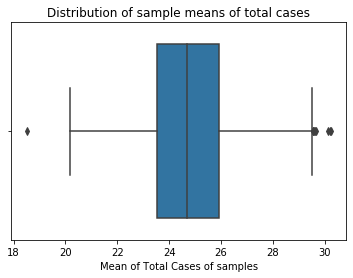

Mean of the total number of cases of all the sample means 24.76075892857143
Mean of the total number of cases of entire dataset 24.67513736263736


In [26]:
sns.boxplot(sample_means)
plt.title("Distribution of sample means of total cases")
plt.xlabel("Mean of Total Cases of samples")
plt.show()
print("Mean of the total number of cases of all the sample means",np.mean(sample_means))
print("Mean of the total number of cases of entire dataset", data.total_cases.mean())

Here the mean of the samples and mean of total cases of the entire dataset is very close.

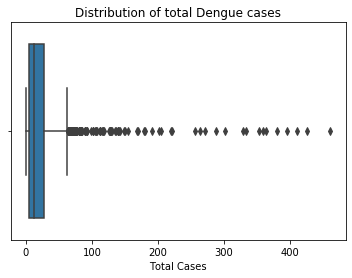

In [27]:
ax = sns.boxplot(x=data["total_cases"])
plt.title("Distribution of total Dengue cases")
plt.xlabel("Total Cases")
plt.show()

The distribution of total cases is skewed to left. The mean here is in the 3rd quartile and data is distributed around the mean though there are few outliers. Also, data is tightly packed around the mean.So we can say that data compiles to central limit theorm.

(array([1266.,  132.,   26.,   12.,    5.,    3.,    2.,    5.,    3.,
           2.]),
 array([  0. ,  46.1,  92.2, 138.3, 184.4, 230.5, 276.6, 322.7, 368.8,
        414.9, 461. ]),
 <a list of 10 Patch objects>)

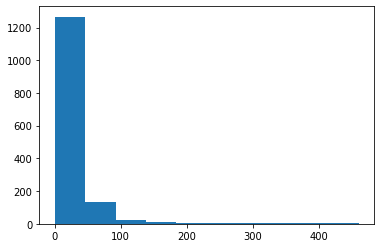

In [28]:
plt.hist(data["total_cases"])

d). Find the mean, min, max and standard deviation of total_cases by city

In [29]:
#mean by total cases city
print("Mean of total cases:", data.groupby('city')['total_cases'].mean())
#Min by total cases city
print("Minimum of total cases:", data.groupby('city')['total_cases'].min())
#Max by total cases city
print("Maximum of total cases:", data.groupby('city')['total_cases'].max())
#SD by total cases city
print("Standard Deviation of total cases:", data.groupby('city')['total_cases'].std())

Mean of total cases: city
iq     7.565385
sj    34.180556
Name: total_cases, dtype: float64
Minimum of total cases: city
iq    0
sj    0
Name: total_cases, dtype: int64
Maximum of total cases: city
iq    116
sj    461
Name: total_cases, dtype: int64
Standard Deviation of total cases: city
iq    10.765478
sj    51.381372
Name: total_cases, dtype: float64


e). Read the relationship between mean and standard deviation from the link given here and describe the data of total_cases by city, if there is too much variation or too little variation https://www-users.york.ac.uk/~mb55/msc/applbio/week3/sd_text.pdf

In [30]:
x = data[(data['city'] == 'iq')]
y = data[(data['city'] == 'sj')]

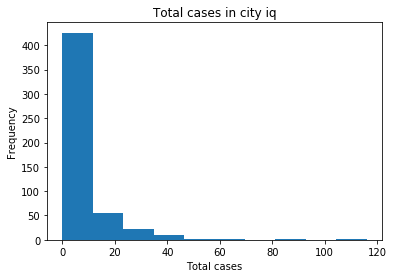

In [31]:
plt.hist(x['total_cases'])
plt.xlabel("Total cases")
plt.ylabel("Frequency")
plt.title("Total cases in city iq")
plt.show()

In [32]:
print("Mean of the city IQ",x.total_cases.mean())
print("Standard Deviation of city IQ",x.total_cases.std())

Mean of the city IQ 7.565384615384615
Standard Deviation of city IQ 10.765478342208679


In [33]:
print(x.total_cases.mean()+x.total_cases.std())
print(x.total_cases.mean()-x.total_cases.std())
print(x.total_cases.mean()+2*(x.total_cases.std()))
print(x.total_cases.mean()-2*(x.total_cases.std()))

18.330862957593293
-3.200093726824064
29.096341299801974
-13.965572069032742


For the city IQ the total number of cases are mostly within two standard deviations of the mean. There are very few entries beyond the mean + 2 standard deviations.95% of the observations lie within the two standard deviations of the mean.

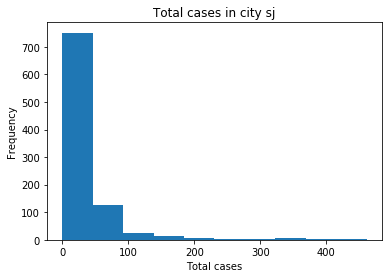

In [34]:
plt.hist(y['total_cases'])
plt.xlabel("Total cases")
plt.ylabel("Frequency")
plt.title("Total cases in city sj")
plt.show()

In [35]:
print("Mean of the city SJ",y.total_cases.mean())
print("Standard Deviation of city SJ",y.total_cases.std())

Mean of the city SJ 34.18055555555556
Standard Deviation of city SJ 51.38137249715158


In [36]:
print(y.total_cases.mean()+y.total_cases.std())
print(y.total_cases.mean()-y.total_cases.std())
print(y.total_cases.mean()+2*(y.total_cases.std()))
print(y.total_cases.mean()-2*(y.total_cases.std()))

85.56192805270715
-17.200816941596024
136.94330054985872
-68.5821894387476


For the city SJ the total number of cases are mostly within two standard deviations of the mean. There are very few entries beyond the mean + 2 standard deviations.95% of the observations lie within the two standard deviations of the mean.

3. How many years in the city iq have greater than or equal to 50 total_cases of dengue and in which years?

In [37]:
df_iq = data[(data['city'] == 'iq') & (data['total_cases']>=50)]

In [38]:
print("Number of years in city iq with cases greater than or equal to 50 are",df_iq.year.count())

Number of years in city iq with cases greater than or equal to 50 are 5


In [39]:
print("Years with cases greater than or equal to 50 are",df_iq.year.unique())

Years with cases greater than or equal to 50 are [2004 2008]


4. Optional Question (no credit, or no extra credit): Find and remove the outliers to bring the mean and standard deviation closer to each other.

5. Create a temp data frame by grouping the total_cases by weekofyear and draw a histogram of total_cases and provide insights based on the distribution. 

In [40]:
df_temp=data.groupby(['weekofyear'])[["total_cases"]].sum()
df_temp.shape

(53, 1)

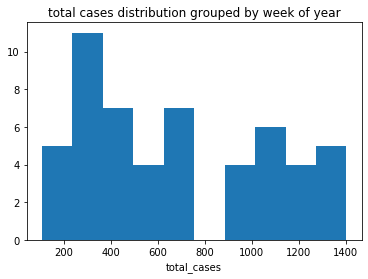

In [41]:
plt.hist(df_temp.total_cases)
plt.xlabel('total_cases')
plt.title('total cases distribution grouped by week of year')
plt.show()

In [43]:
# plt.scatter(x ='weekofyear',y='total_cases', data= df_temp)
# plt.xlabel("Week of the Year")
# plt.ylabel("Total cases")
# plt.title("Week of year and Total cases Grouped by week of year")
# plt.show()

In [44]:
df_temp.columns

Index(['total_cases'], dtype='object')

From the histogram of the total cases grouped by week of the day we can see that the data is skewed towards the right. And with the scatter plot we observe that total cases reduce during the weeks from 0 to 20 and then increase and reach maximum point of 1400 at around week 40 and then reduce after week 40.

Extra point if all the plots have the following decorators:

Plot title

X-label, Y-label

X-ticks and y-ticks have proper sequence matching dataset, non overlapping text

Colored plots

Legend, if there is grouping in plot